In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Gradient Tool #
We start by loading all the packages we're going to need…

In [2]:
import re

import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sbs

import gradienttool as gt
import shared as ip2

from gradienttool.__main__ import normaliseArray

OK, that's the setup done.

Now we load our data from the disk and get it into a format suitable for analysis.

In [3]:
# read from disk
inp = ip2.readCsvNamedMatrix(open("gradienttool/testdata/demData.csv"))

# strip out TP from column names, convert to array and normalise so time runs from $0…1$
t = [re.sub("^TP","",x) for x in inp.colnames]
t = normaliseArray(np.asarray(t, dtype=np.float64))

# "time prime" the times we want to predict significant gradients
tp = np.unique(t)

# TODO: need some way of getting back to non-normalised times!

Now shove the data into Gradient Tool and run everything…

In [4]:
# which row of data are we working with
index = 0

# put the data into our Gradient Tool
g = gt.GradientTool(t, inp.data[index,:])

# Set Priors on Hyperparameters
g.setPriorRbfLengthscale(2.0, 0.2)
g.setPriorRbfVariance(2.0, 0.5)
g.setPriorNoiseVariance(1.5, 0.1)

# Optimise Hyperparameters
g.optimize()

Analysis complete, lets see the results…

[[  0.        0.01647   0.00859   6.70372   1.61835   5.26963]
 [  0.04762   0.3275    0.00403   6.27285   0.79921   7.01673]
 [  0.09524   0.60581   0.00311   5.33472   0.36857   8.78719]
 [  0.14286   0.82841   0.00308   3.94712   0.20228   8.77611]
 [  0.19048   0.97628   0.003     2.21793   0.16656   5.43447]
 [  0.2381    1.03656   0.00281   0.29551   0.16638   0.72447]
 [  0.28571   1.00411   0.00266  -1.64612   0.16033  -4.11102]
 [  0.33333   0.88236   0.00261  -3.42581   0.14611  -8.96232]
 [  0.38095   0.68311   0.00261  -4.87507   0.13469 -13.2834 ]
 [  0.42857   0.42551   0.0026   -5.85682   0.13152 -16.14987]
 [  0.47619   0.1342    0.00259  -6.28071   0.13281 -17.23446]
 [  0.52381  -0.16323   0.00259  -6.11326   0.13281 -16.77497]
 [  0.57143  -0.43903   0.0026   -5.3814    0.13152 -14.83892]
 [  0.61905  -0.66809   0.00261  -4.16907   0.13469 -11.35973]
 [  0.66667  -0.83052   0.00261  -2.60725   0.14611  -6.82087]
 [  0.71429  -0.91343   0.00266  -0.85848   0.16033  -2

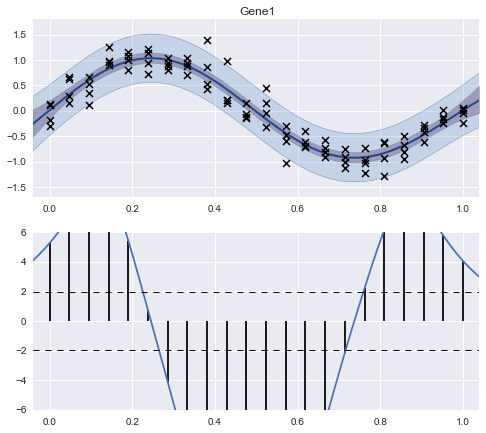

In [5]:
g.plot(inp.rownames[index],mpl.figure(figsize=(8,7)))

np.set_printoptions(precision=5, edgeitems=8, suppress=True, linewidth=1000)
print(g.getResults())

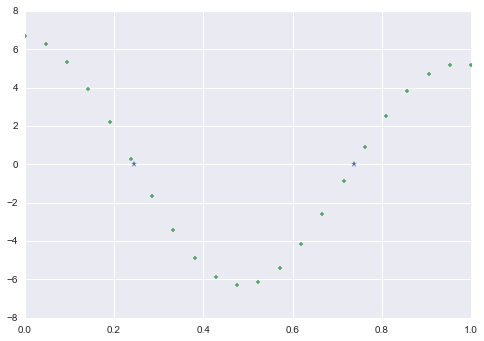

In [6]:
res = g.getResults()
zi = gt.zerosLinearInterpolate(res[:,[0,3]])
mpl.plot(zi, np.zeros(len(zi)),'*')
mpl.plot(res[:,0], res[:,3],'.');